In [2]:
from generate_data import generate_frequency_domain_signal, default_cbc_params
from get_data import get_psd_frequency_series
from likelihood import MDCGaussianNoise
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['font.size'] = 12  # global font size
import numpy as np
from pycbc.conversions import mc

In [3]:
cbc_params = dict(default_cbc_params)
cbc_params['mass1'] = 12
cbc_params['mass2'] = 12
signal = generate_frequency_domain_signal(cbc_params)

Waveform approximate duration: 177.3s
Segment duration: 256.0s


(1e-52, 9.54823376190719e-47)

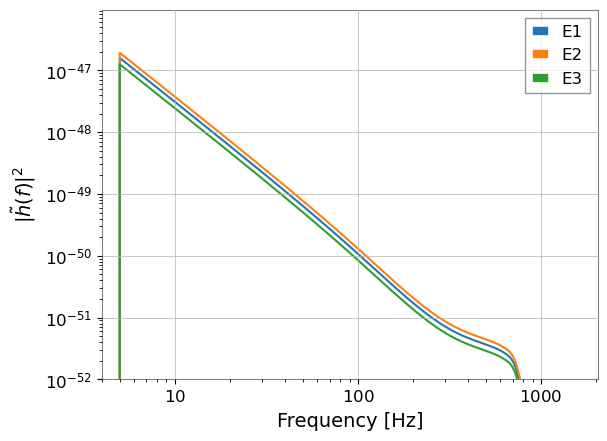

In [22]:
plt.figure()
ax = plt.gca()
ax.loglog(signal['E1'].get_sample_frequencies(), np.abs(signal['E1'])**2, label='E1')
ax.loglog(signal['E2'].get_sample_frequencies(), np.abs(signal['E2'])**2, label='E2')
ax.loglog(signal['E3'].get_sample_frequencies(), np.abs(signal['E3'])**2, label='E3')
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'$|\tilde{h}(f)|^2$')
ax.set_xlim(4, 2048)
ax.set_ylim(1e-52)

(150.0, 151.0)

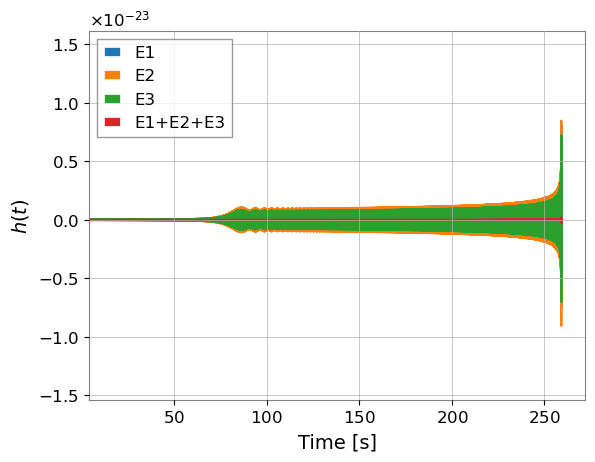

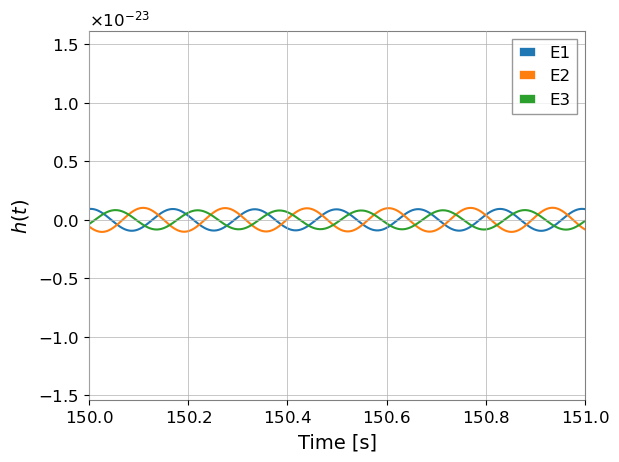

In [28]:
tsd1 = signal['E1'].to_timeseries()
tsd2 = signal['E2'].to_timeseries()
tsd3 = signal['E3'].to_timeseries()

plt.figure()
ax = plt.gca()
ax.plot(tsd1.get_sample_times(), tsd1, label='E1')
ax.plot(tsd2.get_sample_times(), tsd2, label='E2')
ax.plot(tsd3.get_sample_times(), tsd3, label='E3')
ax.plot(tsd3.get_sample_times(), tsd1+tsd2+tsd3, label='E1+E2+E3')

ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'${h}(t)$')
ax.set_xlim(4)

# Zoom to see the dephasing between detectors
plt.figure()
ax = plt.gca()
ax.plot(tsd1.get_sample_times(), tsd1, label='E1')
ax.plot(tsd2.get_sample_times(), tsd2, label='E2')
ax.plot(tsd3.get_sample_times(), tsd3, label='E3')
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'${h}(t)$')
ax.set_xlim(150,151)

## Test MDCGaussianNoise likelihood model with this signal

In [36]:
psd = get_psd_frequency_series(signal['E1'].get_sample_frequencies(), signal['E1'].get_delta_f())
psds = {'E1': psd, 'E2': psd, 'E3': psd}

# We know the signal parameters so we can define injection_params and compute optimal likelihoods
model = MDCGaussianNoise(signal, psds, injection_params=cbc_params)

optimal_loglr, optimal_loglikelihood = model.compute_optimal_likelihoods()
print('Optimal log likelihood ratio: ' + format(optimal_loglr, '.2f'))
print('Optimal log likelihood: ' + format(optimal_loglikelihood, '.2f'))

snr_network_sq = model.det_optimal_snrsq('E1') + model.det_optimal_snrsq('E2') + model.det_optimal_snrsq('E3')
print('1/2 network SNR: ' + format(0.5 * snr_network_sq, '.2f'))

Optimal log likelihood ratio: 252.23
Optimal log likelihood: 0.00
1/2 network SNR: 252.23
